# lab 8
## IDs
Eldad Kronfeld 313429607

Vlad Barkanas  317225993

In [1]:
# -*- coding: utf-8 -*-
"""
Image Processing
"""
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
from PIL import Image


#Open Image
im0 = Image.open("sad_cat.jpg")
title0 = Image.open("titles.jpg")

img = mpimg.imread('sad_cat.jpg')
title = mpimg.imread('titles.jpg')
title1 = title[:,:,0]

rows = title1.shape[0]
cols = title1.shape[1]


gr_im =  0.2989*img[:,:,0] + 0.5870*img[:,:,1] + 0.1140*img[:,:,2]

title_inv = 255 - title1

rows2=rows//2
title2 = title_inv[0:rows2,:]


# title start
here I took a radius which I proposed and looked at when the actuall picture starts , I found a radius that works and used it

In [2]:
def title_start(img, radius):
    """
    takes an img and moves from the bottom up to find the first line that is outside the
    radius where every line is a vector and the all black vector is norm = 0;
    """
    rows = len(img)
    for i in range(rows-1,-1,-1):
        if np.linalg.norm(img[i]) > radius:
            return i
    return 0   

rad = 3400
start = title_start(gr_im,rad)
size = len(gr_im) - start

# find title
I used the fact that the picture of the title is a black and white so I looked at the picture line by line untill the text starts, find the center of the texts and copy the wanted section.

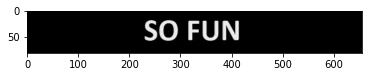

In [3]:

def find_title(title_img, size):
    """
    title_img: img containing the title we want to crop;
    size: the amount of lines we want to crop;
    """
    noise = 10
    start = 0
    for l,row in enumerate(title_img):
            if np.linalg.norm(row) > noise:
                start = l
                break
    end = len(title_img)-1
    for l,row in enumerate(title_img[start:]):
        if np.linalg.norm(row) == 0:
                end = start+l
                break
    center = (end-start)//2 + start
    title_start = (center - size//2) if (center - size//2)>=0 else 0 
    title_end = (center + size//2) if (center + size//2)<len(title_img) else (len(title_img)) 
    return title_img[title_start:title_end,:]

cropped_title = find_title(title2,size)
plt.imshow(cropped_title,cmap= 'gray')
plt.show()


# fitting the sizes
the title picture and the cat image is not of the same sizes so I addes a bit of padding in order to make it fit.

In [4]:
tmp = np.zeros((len(cropped_title),max(len(gr_im[0]),len(cropped_title))))
tmp[:,:len(cropped_title[0])] = cropped_title
finished = np.concatenate((gr_im[0:start],tmp))

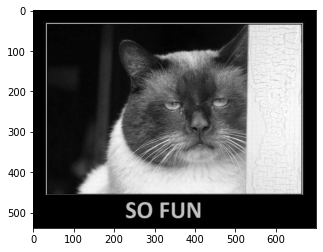

In [5]:
plt.imshow(finished,cmap='gray')
plt.show()
